In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

file_path = "C:/Users/kragg/OneDrive/Documents/Code/Data/uber.csv"
uber_data = pd.read_csv(file_path)

uber_data['date'] = pd.to_datetime(uber_data['pickup_datetime']) 


uber_data['day_of_week'] = uber_data['date'].dt.dayofweek


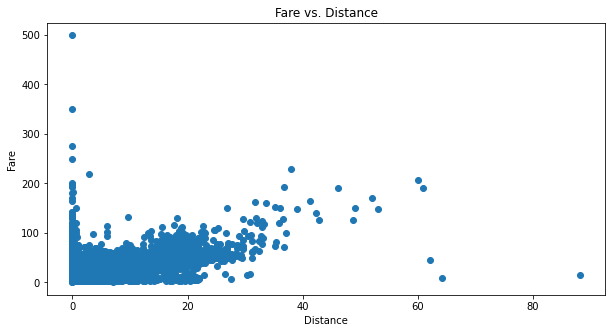

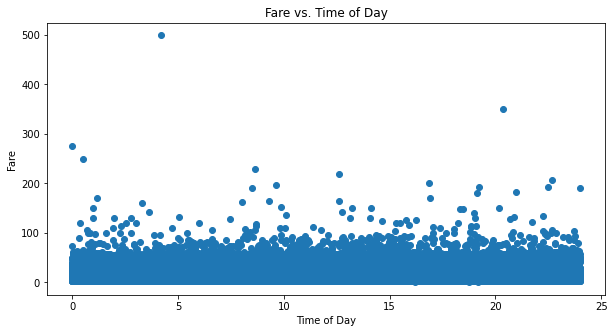

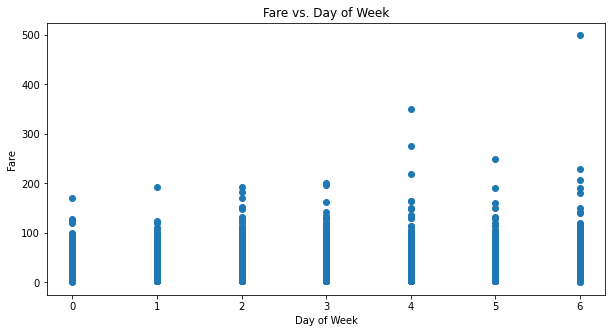

In [2]:
plt.figure(figsize=(10, 5))
plt.scatter(uber_data['distance_km'], uber_data['fare_amount'])
plt.title('Fare vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(uber_data['time_of_day'], uber_data['fare_amount'])
plt.title('Fare vs. Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(uber_data['day_of_week'], uber_data['fare_amount'])
plt.title('Fare vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fare')
plt.show()

In [3]:
X_distance = uber_data[['distance_km']]
y = uber_data['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X_distance, y, test_size=0.2, random_state=42)

model_distance = LinearRegression()
model_distance.fit(X_train, y_train)
y_pred_distance = model_distance.predict(X_test)

print("Linear Regression (Fare vs. Distance)")
print("MSE:", mean_squared_error(y_test, y_pred_distance))
print("R-squared:", r2_score(y_test, y_pred_distance))

X_time = uber_data[['time_of_day']]
X_train, X_test, y_train, y_test = train_test_split(X_time, y, test_size=0.2, random_state=42)

model_time = LinearRegression()
model_time.fit(X_train, y_train)
y_pred_time = model_time.predict(X_test)

print("Linear Regression (Fare vs. Time of Day)")
print("MSE:", mean_squared_error(y_test, y_pred_time))
print("R-squared:", r2_score(y_test, y_pred_time))

Linear Regression (Fare vs. Distance)
MSE: 26.26238930940218
R-squared: 0.7251109965874536
Linear Regression (Fare vs. Time of Day)
MSE: 95.50063500347395
R-squared: 0.00039276426490963967


In [4]:
X = uber_data[['distance_km', 'time_of_day', 'day_of_week']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

print("Gradient Boosted Regression (Fare vs. Distance and Time of Day)")
print("MSE:", mean_squared_error(y_test, y_pred_gbr))
print("R-squared:", r2_score(y_test, y_pred_gbr))

Gradient Boosted Regression (Fare vs. Distance and Time of Day)
MSE: 22.78171148867143
R-squared: 0.7615433274796883
